# Importar pacotes necessários

In [1]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregamento de Dados

In [2]:
# Configurar o estilo dos gráficos
sns.set(style="whitegrid")

# Carregar dados
df = pd.read_excel('Bases/EdenBase.xlsx').drop(columns=["Carimbo de data/hora", "Nome"])
df_capping = pd.read_excel('Bases/EdenBase_capping.xlsx')
df_iqr = pd.read_excel('Bases/EdenBase_iqr.xlsx')
df_log = pd.read_excel('Bases/EdenBase_log.xlsx')
df_raiz = pd.read_excel('Bases/EdenBase_sqrt.xlsx')

# Listar dataframes para normalizações
lista_df = [df, df_capping, df_iqr, df_log, df_raiz]


# Loop de Processamento e Modelagem:
#### Pré-processamento: Remove colunas irrelevantes, codifica variáveis categóricas e aplica balanceamento com SMOTE.
#### Divisão e Normalização dos Dados: Divide os dados em treino e teste e aplica normalização.
#### Treinamento e Otimização de Modelos: Avalia os modelos usando GridSearchCV e registra as métricas de desempenho.

In [22]:
# # Inicializar lista para resultados
# model_results = []

# for idx, df_norm in enumerate(lista_df):
#     # Remover colunas irrelevantes
#     df_norm = df_norm.drop(columns=["endereco"])

#     # Codificação das colunas categóricas
#     label_encoders = {}
#     for column in df_norm.select_dtypes(include="object").columns:
#         label_encoders[column] = LabelEncoder()
#         df_norm[column] = label_encoders[column].fit_transform(df_norm[column].astype(str))

#     # Definir X e y
#     X = df_norm.drop("Usaria o aplicativo", axis=1)
#     y = df_norm["Usaria o aplicativo"].astype("int")

#     # Aplicar SMOTE para balanceamento
#     smote = SMOTE(random_state=42, k_neighbors=3)
#     X, y = smote.fit_resample(X, y)

#     # Dividir em treino e teste com stratificação
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

#     # Normalizar os dados
#     scaler = StandardScaler()
#     X_train = scaler.fit_transform(X_train)
#     X_test = scaler.transform(X_test)

#     # Modelos e hiperparâmetros para otimização
#     models = {
#         "Random Forest": RandomForestClassifier(random_state=42),
#         "KNN": KNeighborsClassifier(),
#         "Logistic Regression": LogisticRegression(random_state=42, max_iter=200),
#         "Naive Bayes": GaussianNB(),
#         "Decision Tree": DecisionTreeClassifier(random_state=42),
#         "Gradient Boosting": GradientBoostingClassifier(random_state=42)
#     }

#     param_grids = {
#         "Random Forest": {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]},
#         "KNN": {'n_neighbors': [3, 5, 7, 9]},
#         "Logistic Regression": {'C': [0.1, 1, 10]},
#         "Decision Tree": {'max_depth': [None, 10, 20, 30]},
#         "Gradient Boosting": {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1, 0.2]}
#     }

#     # Avaliar modelos com GridSearchCV e calcular métricas
#     metrics = {"Model": [], "Accuracy": [], "Precision": [], "Recall": [], "F1 Score": [], "Normalization Type": []}

#     for model_name, model in models.items():
#         # Ajuste do modelo e GridSearchCV
#         if model_name in param_grids:
#             grid = GridSearchCV(model, param_grids[model_name], cv=StratifiedKFold(5), scoring='f1_weighted')
#             grid.fit(X_train, y_train)
#             model = grid.best_estimator_
#         else:
#             model.fit(X_train, y_train)

#         y_pred = model.predict(X_test)
        
#         # Registrar métricas e exibir relatório de classificação
#         metrics["Model"].append(model_name)
#         metrics["Accuracy"].append(accuracy_score(y_test, y_pred))
#         metrics["Precision"].append(precision_score(y_test, y_pred, average="weighted"))
#         metrics["Recall"].append(recall_score(y_test, y_pred, average="weighted"))
#         metrics["F1 Score"].append(f1_score(y_test, y_pred, average="weighted"))
#         metrics["Normalization Type"].append(f"Normalization_{idx+1}")

#         # Imprimir relatório de classificação
#         print(f"Relatório de classificação para {model_name} com Normalização {idx+1}:\n", classification_report(y_test, y_pred, zero_division=0))

#     # Converter resultados de métricas para DataFrame e armazenar
#     metrics_df = pd.DataFrame(metrics)
#     model_results.append(metrics_df)

#     # Gráficos para cada métrica
#     for metric in ["Accuracy", "Precision", "Recall", "F1 Score"]:
#         plt.figure(figsize=(10, 6))
#         sns.barplot(x="Model", y=metric, hue="Normalization Type", data=metrics_df)
#         plt.title(f"{metric} por Modelo para Normalização {idx+1}")
#         plt.ylabel(metric)
#         plt.xlabel("Modelos")
#         plt.xticks(rotation=45)
#         plt.legend(loc="upper right")
#         plt.tight_layout()
#         plt.show()

Relatório de classificação para Random Forest com Normalização 1:
               precision    recall  f1-score   support

           0       1.00      0.69      0.81        16
           1       0.88      0.44      0.58        16
           2       0.52      0.94      0.67        16

    accuracy                           0.69        48
   macro avg       0.80      0.69      0.69        48
weighted avg       0.80      0.69      0.69        48

Relatório de classificação para KNN com Normalização 1:
               precision    recall  f1-score   support

           0       0.47      1.00      0.64        16
           1       0.60      0.38      0.46        16
           2       0.25      0.06      0.10        16

    accuracy                           0.48        48
   macro avg       0.44      0.48      0.40        48
weighted avg       0.44      0.48      0.40        48

Relatório de classificação para Logistic Regression com Normalização 1:
               precision    recall  f1-sco

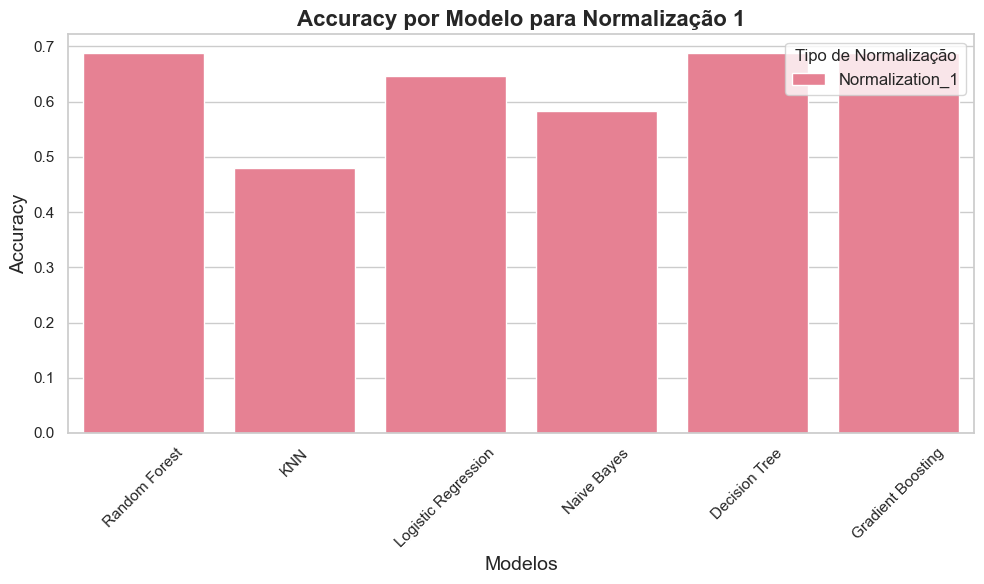

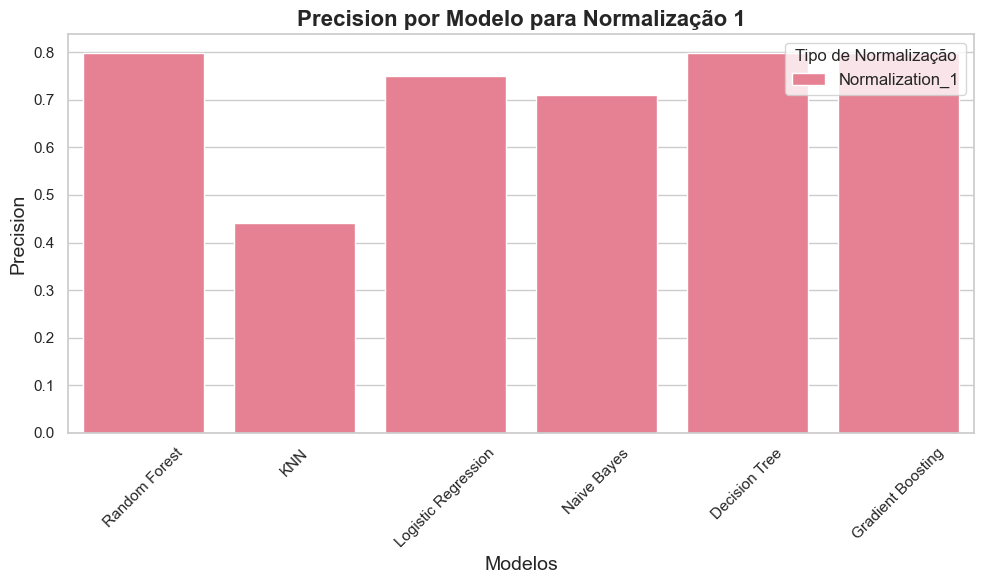

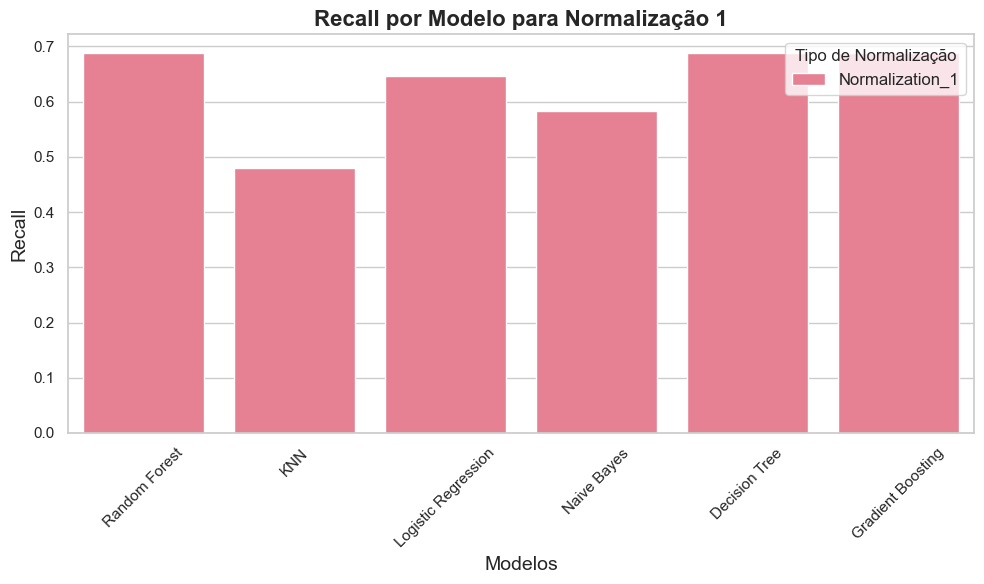

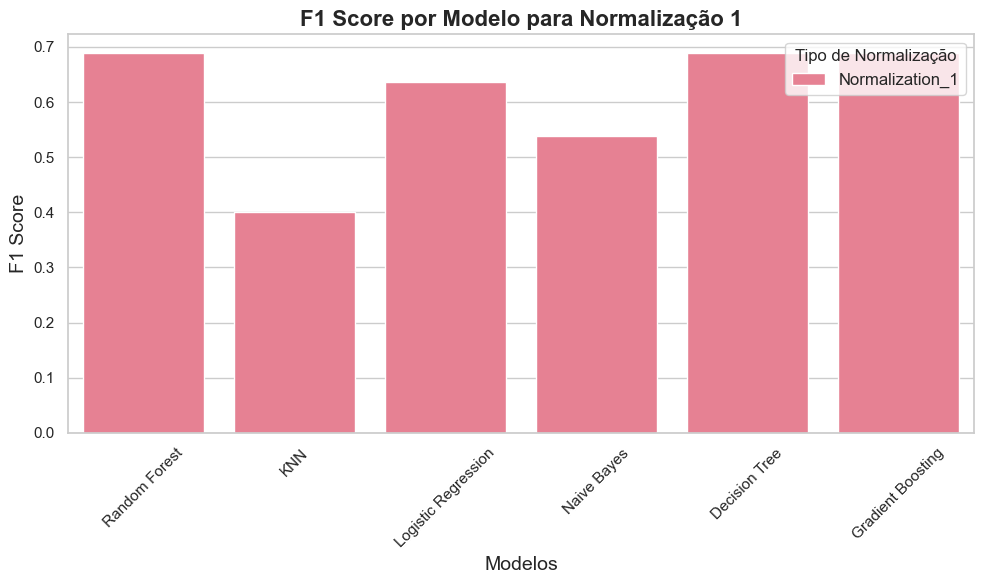

Relatório de classificação para Random Forest com Normalização 2:
               precision    recall  f1-score   support

           0       0.92      0.69      0.79        16
           1       0.86      0.38      0.52        16
           2       0.52      0.94      0.67        16

    accuracy                           0.67        48
   macro avg       0.76      0.67      0.66        48
weighted avg       0.76      0.67      0.66        48

Relatório de classificação para KNN com Normalização 2:
               precision    recall  f1-score   support

           0       0.47      1.00      0.64        16
           1       0.60      0.38      0.46        16
           2       0.25      0.06      0.10        16

    accuracy                           0.48        48
   macro avg       0.44      0.48      0.40        48
weighted avg       0.44      0.48      0.40        48

Relatório de classificação para Logistic Regression com Normalização 2:
               precision    recall  f1-sco

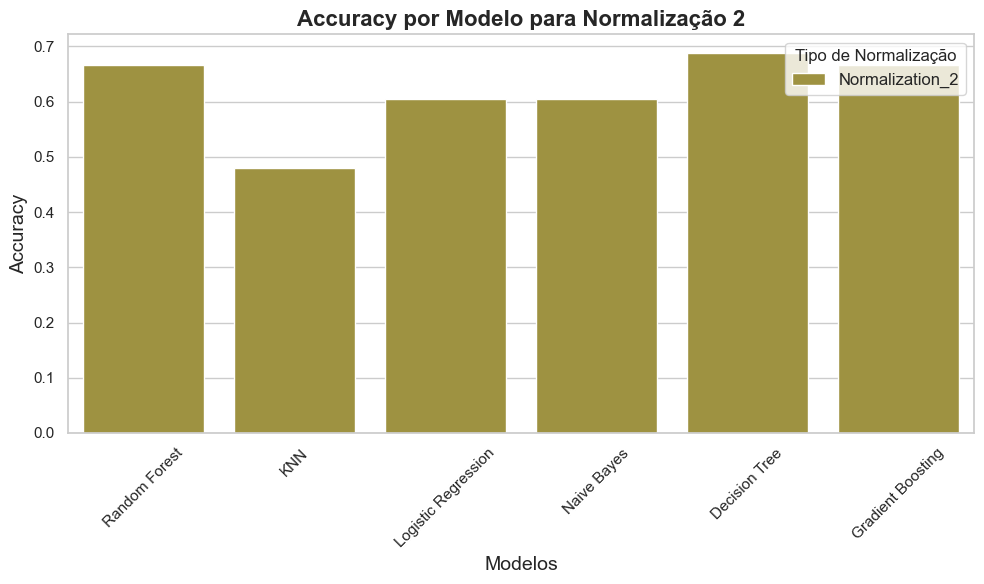

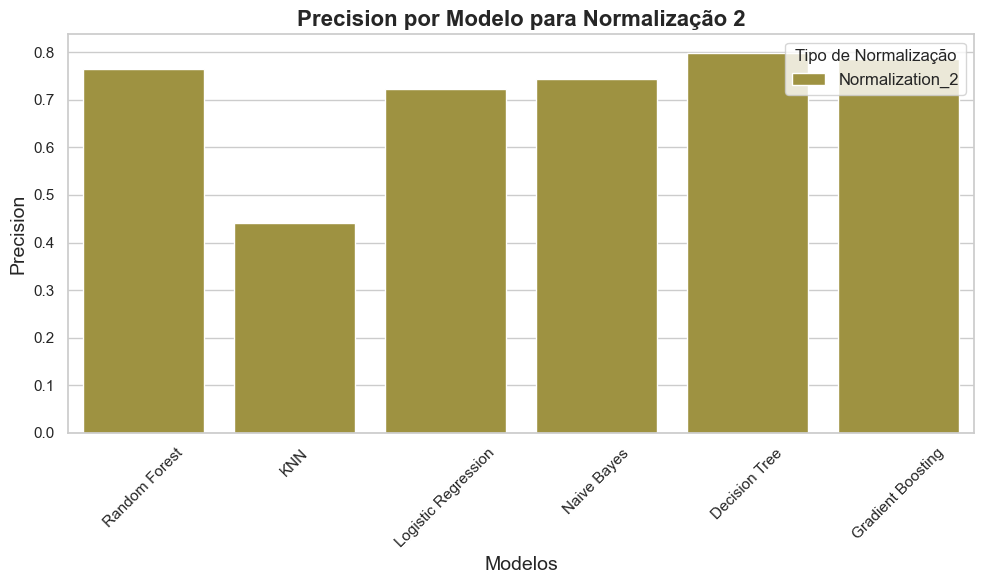

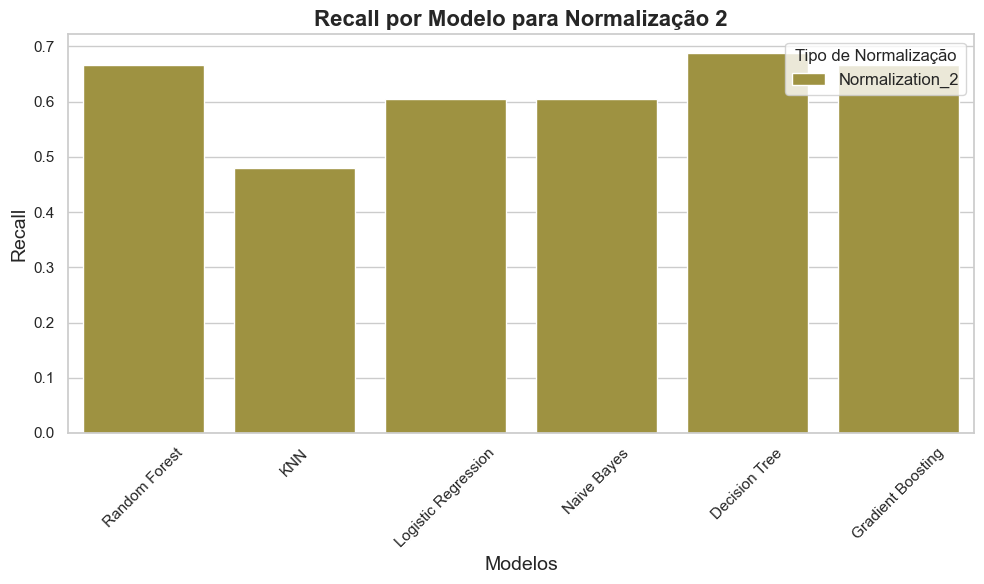

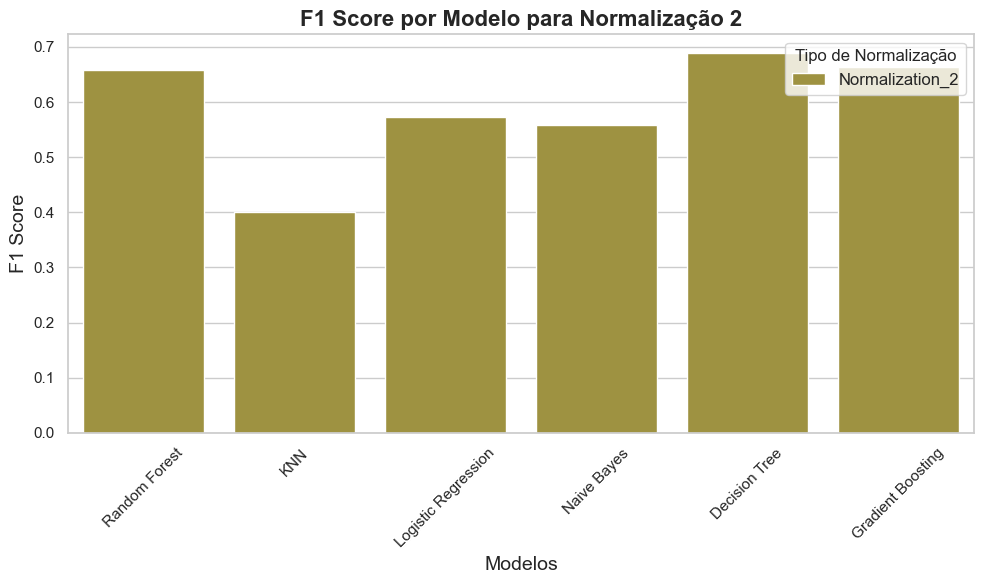

C:\Users\heitorsantos-ieg\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Relatório de classificação para Random Forest com Normalização 3:
               precision    recall  f1-score   support

           0       0.43      1.00      0.60        13
           1       0.00      0.00      0.00        13
           2       0.56      0.38      0.45        13

    accuracy                           0.46        39
   macro avg       0.33      0.46      0.35        39
weighted avg       0.33      0.46      0.35        39



C:\Users\heitorsantos-ieg\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\heitorsantos-ieg\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\heitorsantos-ieg\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Relatório de classificação para KNN com Normalização 3:
               precision    recall  f1-score   support

           0       0.43      1.00      0.60        13
           1       0.00      0.00      0.00        13
           2       0.56      0.38      0.45        13

    accuracy                           0.46        39
   macro avg       0.33      0.46      0.35        39
weighted avg       0.33      0.46      0.35        39

Relatório de classificação para Logistic Regression com Normalização 3:
               precision    recall  f1-score   support

           0       0.43      1.00      0.60        13
           1       0.00      0.00      0.00        13
           2       0.56      0.38      0.45        13

    accuracy                           0.46        39
   macro avg       0.33      0.46      0.35        39
weighted avg       0.33      0.46      0.35        39

Relatório de classificação para Naive Bayes com Normalização 3:
               precision    recall  f1-score

C:\Users\heitorsantos-ieg\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Relatório de classificação para Decision Tree com Normalização 3:
               precision    recall  f1-score   support

           0       0.43      1.00      0.60        13
           1       0.00      0.00      0.00        13
           2       0.56      0.38      0.45        13

    accuracy                           0.46        39
   macro avg       0.33      0.46      0.35        39
weighted avg       0.33      0.46      0.35        39



C:\Users\heitorsantos-ieg\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Relatório de classificação para Gradient Boosting com Normalização 3:
               precision    recall  f1-score   support

           0       0.43      1.00      0.60        13
           1       0.00      0.00      0.00        13
           2       0.56      0.38      0.45        13

    accuracy                           0.46        39
   macro avg       0.33      0.46      0.35        39
weighted avg       0.33      0.46      0.35        39



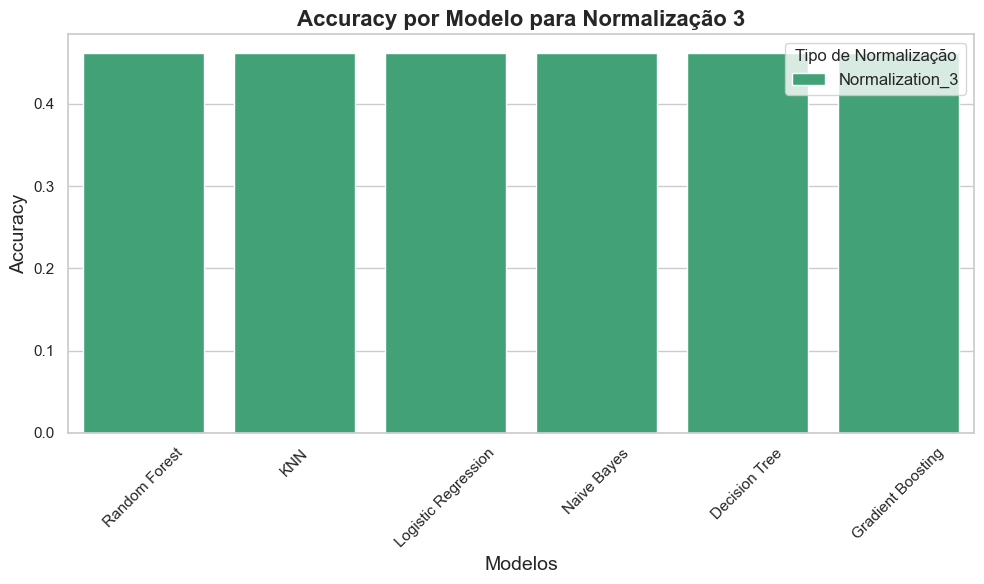

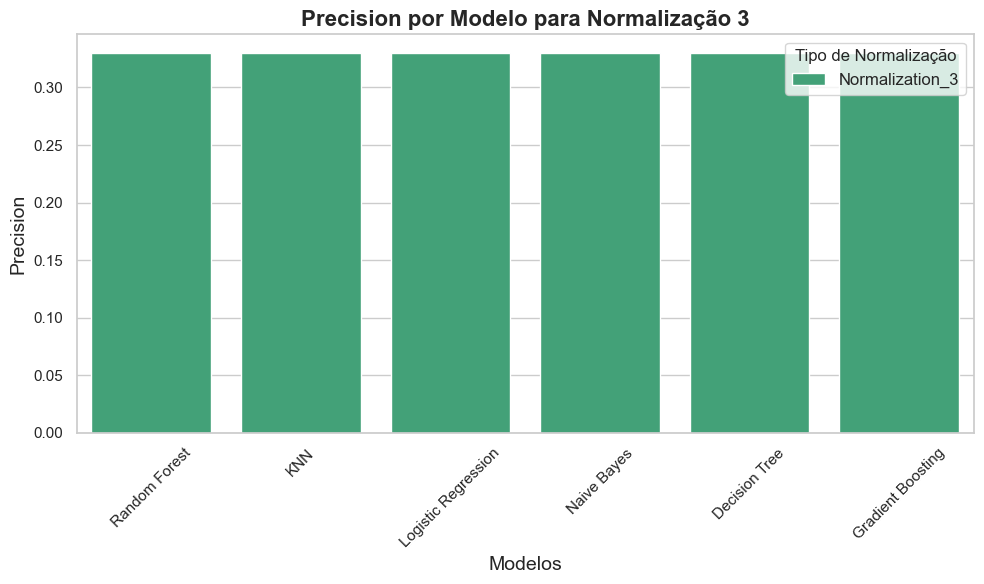

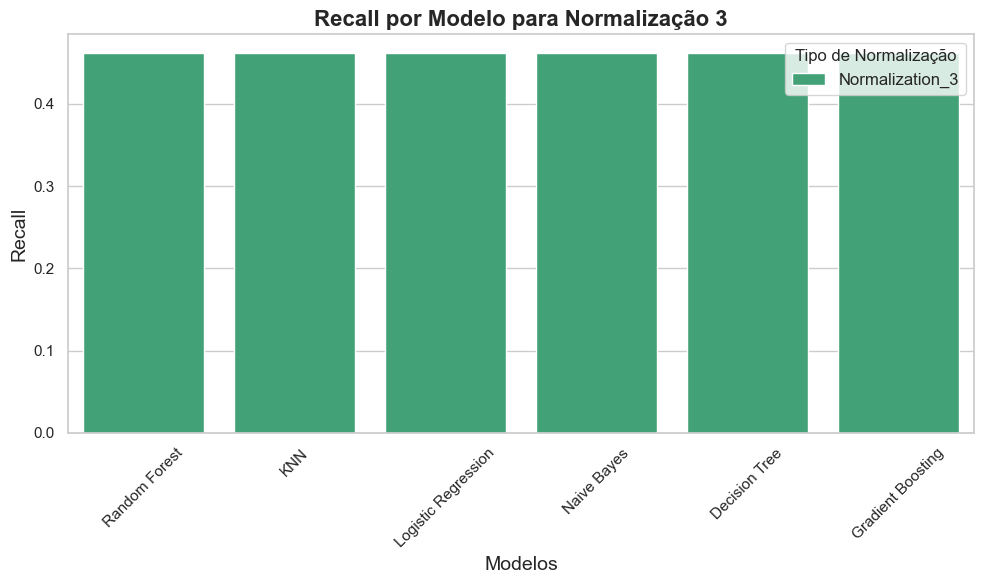

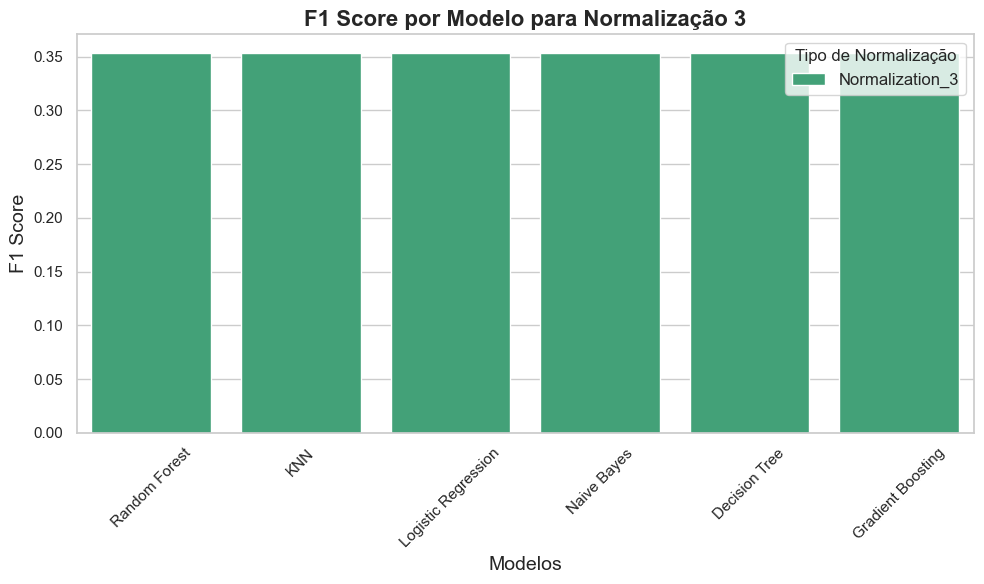

Relatório de classificação para Random Forest com Normalização 4:
               precision    recall  f1-score   support

           0       0.93      0.59      0.72        22
           1       0.70      0.95      0.81        22

    accuracy                           0.77        44
   macro avg       0.81      0.77      0.76        44
weighted avg       0.81      0.77      0.76        44

Relatório de classificação para KNN com Normalização 4:
               precision    recall  f1-score   support

           0       0.63      0.86      0.73        22
           1       0.79      0.50      0.61        22

    accuracy                           0.68        44
   macro avg       0.71      0.68      0.67        44
weighted avg       0.71      0.68      0.67        44

Relatório de classificação para Logistic Regression com Normalização 4:
               precision    recall  f1-score   support

           0       0.93      0.59      0.72        22
           1       0.70      0.95      0

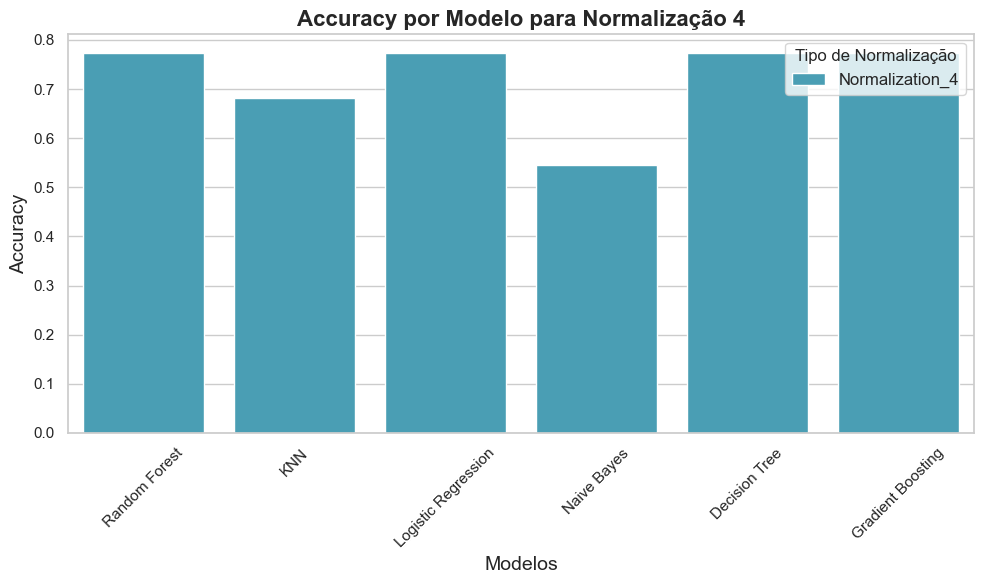

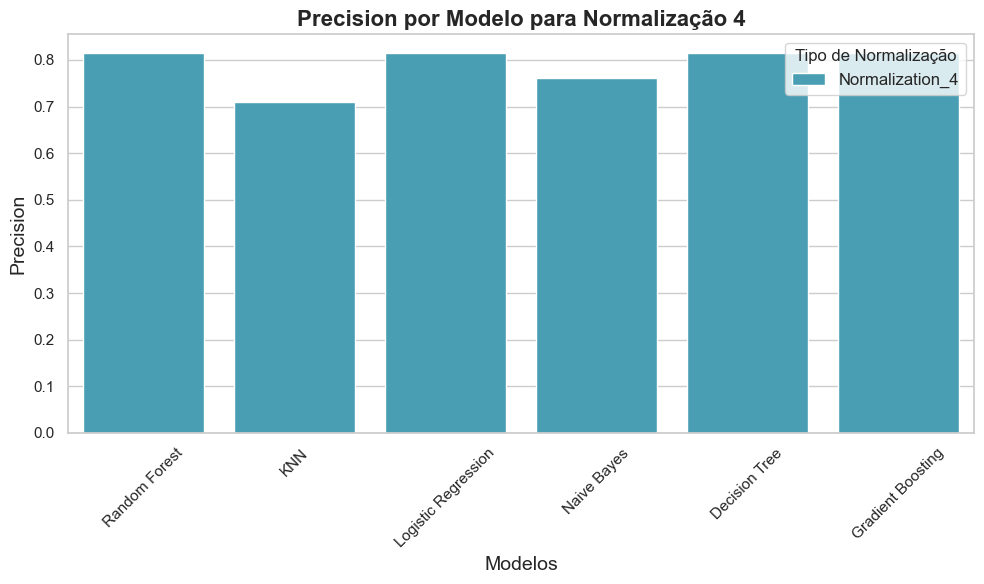

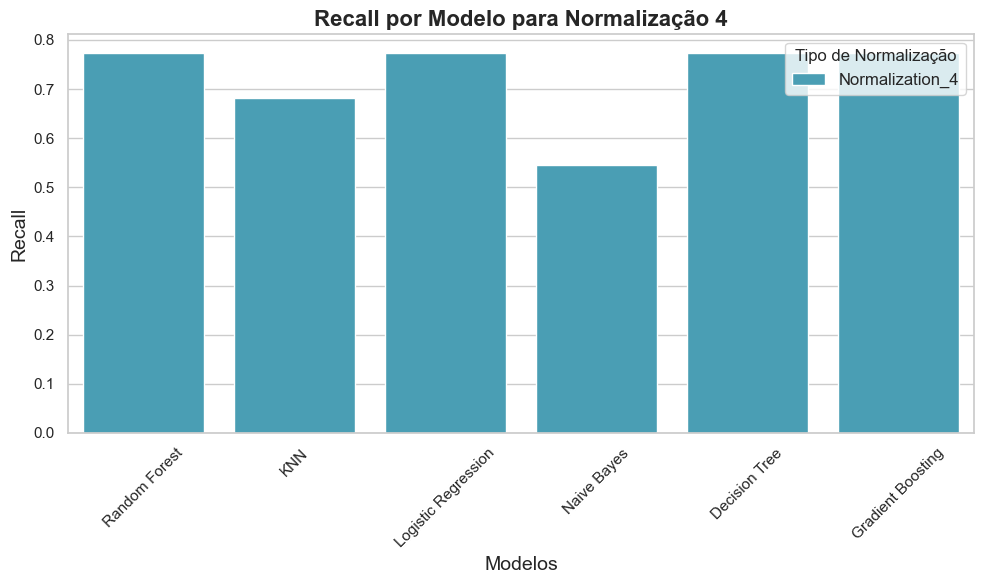

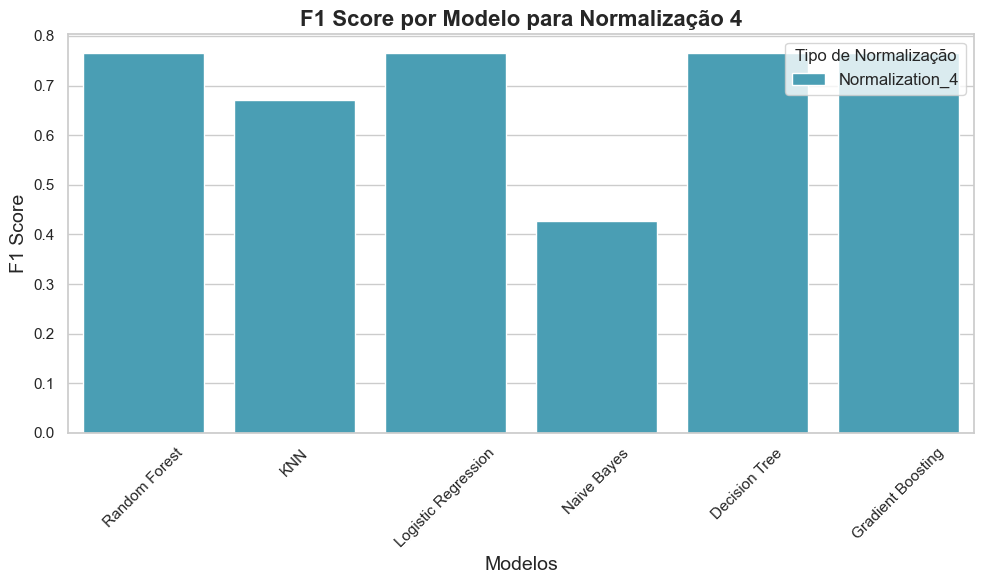

Relatório de classificação para Random Forest com Normalização 5:
               precision    recall  f1-score   support

           0       0.95      0.67      0.78        30
           1       0.74      0.97      0.84        29

    accuracy                           0.81        59
   macro avg       0.84      0.82      0.81        59
weighted avg       0.85      0.81      0.81        59

Relatório de classificação para KNN com Normalização 5:
               precision    recall  f1-score   support

           0       1.00      0.67      0.80        30
           1       0.74      1.00      0.85        29

    accuracy                           0.83        59
   macro avg       0.87      0.83      0.83        59
weighted avg       0.87      0.83      0.83        59

Relatório de classificação para Logistic Regression com Normalização 5:
               precision    recall  f1-score   support

           0       0.83      0.67      0.74        30
           1       0.71      0.86      0

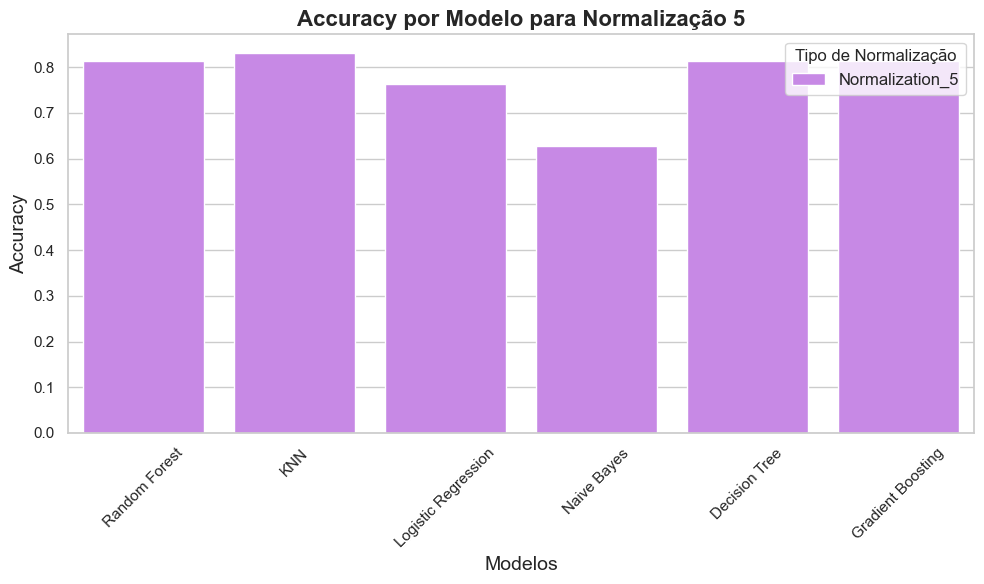

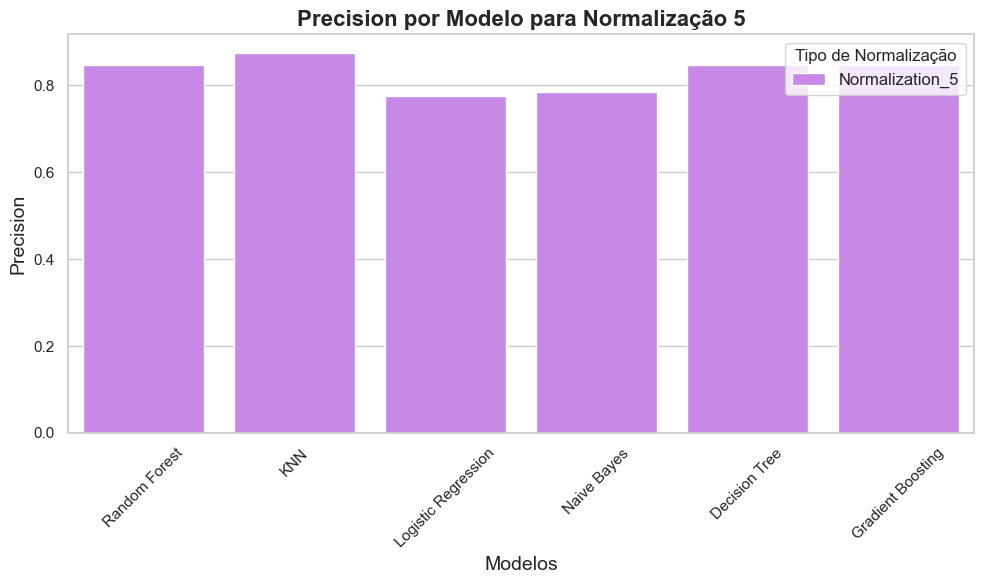

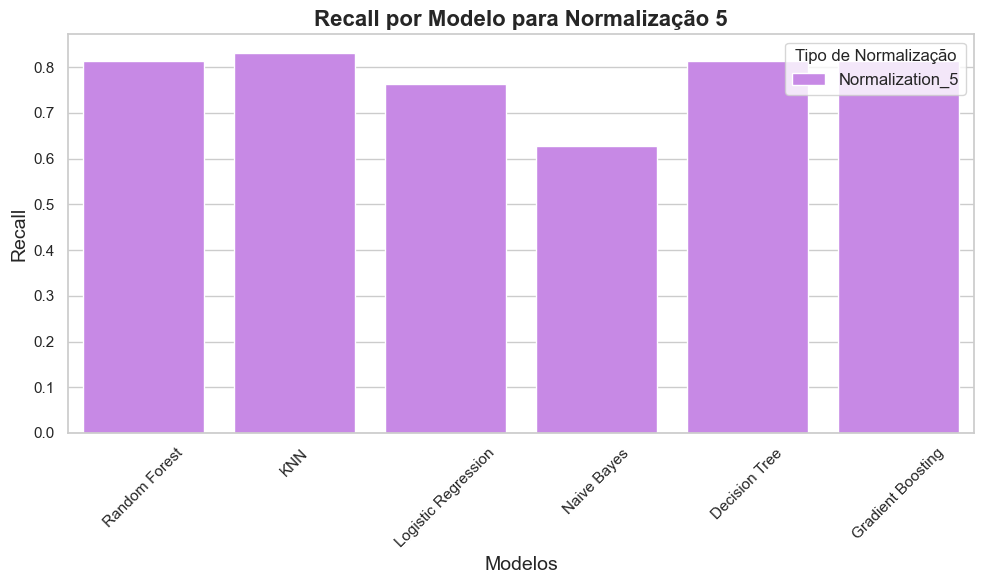

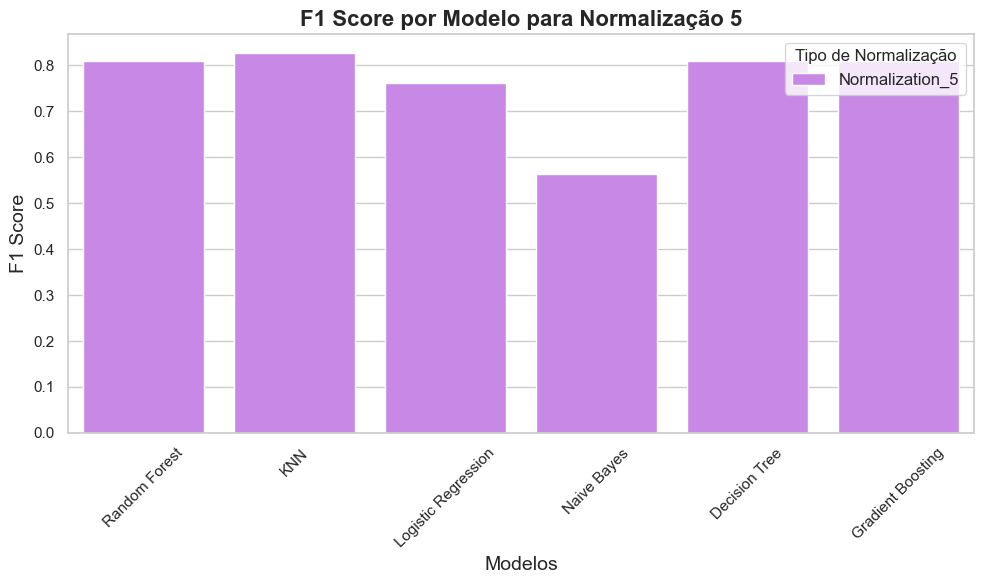

In [23]:
# Configuração geral para gráficos mais bonitos
sns.set_theme(style="whitegrid")
palette = sns.color_palette("husl", len(lista_df))  # Paleta de cores para cada normalização

# Inicializar lista para resultados
model_results = []

for idx, df_norm in enumerate(lista_df):
    # Remover colunas irrelevantes
    df_norm = df_norm.drop(columns=["endereco"])

    # Codificação das colunas categóricas
    label_encoders = {}
    for column in df_norm.select_dtypes(include="object").columns:
        label_encoders[column] = LabelEncoder()
        df_norm[column] = label_encoders[column].fit_transform(df_norm[column].astype(str))

    # Definir X e y
    X = df_norm.drop("Usaria o aplicativo", axis=1)
    y = df_norm["Usaria o aplicativo"].astype("int")

    # Aplicar SMOTE para balanceamento
    smote = SMOTE(random_state=42, k_neighbors=3)
    X, y = smote.fit_resample(X, y)

    # Dividir em treino e teste com stratificação
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

    # Normalizar os dados
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Modelos e hiperparâmetros para otimização
    models = {
        "Random Forest": RandomForestClassifier(random_state=42),
        "KNN": KNeighborsClassifier(),
        "Logistic Regression": LogisticRegression(random_state=42, max_iter=200),
        "Naive Bayes": GaussianNB(),
        "Decision Tree": DecisionTreeClassifier(random_state=42),
        "Gradient Boosting": GradientBoostingClassifier(random_state=42)
    }

    param_grids = {
        "Random Forest": {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30]},
        "KNN": {'n_neighbors': [3, 5, 7, 9]},
        "Logistic Regression": {'C': [0.1, 1, 10]},
        "Decision Tree": {'max_depth': [None, 10, 20, 30]},
        "Gradient Boosting": {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1, 0.2]}
    }

    # Avaliar modelos com GridSearchCV e calcular métricas
    metrics = {"Model": [], "Accuracy": [], "Precision": [], "Recall": [], "F1 Score": [], "Normalization Type": []}

    for model_name, model in models.items():
        # Ajuste do modelo e GridSearchCV
        if model_name in param_grids:
            grid = GridSearchCV(model, param_grids[model_name], cv=StratifiedKFold(5), scoring='f1_weighted')
            grid.fit(X_train, y_train)
            model = grid.best_estimator_
        else:
            model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        
        # Registrar métricas e exibir relatório de classificação
        metrics["Model"].append(model_name)
        metrics["Accuracy"].append(accuracy_score(y_test, y_pred))
        metrics["Precision"].append(precision_score(y_test, y_pred, average="weighted"))
        metrics["Recall"].append(recall_score(y_test, y_pred, average="weighted"))
        metrics["F1 Score"].append(f1_score(y_test, y_pred, average="weighted"))
        metrics["Normalization Type"].append(f"Normalization_{idx+1}")

        # Imprimir relatório de classificação
        print(f"Relatório de classificação para {model_name} com Normalização {idx+1}:\n", classification_report(y_test, y_pred, zero_division=0))

    # Converter resultados de métricas para DataFrame e armazenar
    metrics_df = pd.DataFrame(metrics)
    model_results.append(metrics_df)

    # Gráficos para cada métrica
    for metric in ["Accuracy", "Precision", "Recall", "F1 Score"]:
        plt.figure(figsize=(10, 6))
        
        # Barplot com coloração distinta para cada normalização
        sns.barplot(
            x="Model",
            y=metric,
            hue="Normalization Type",
            data=metrics_df,
            palette=[palette[idx]]  # Cor específica para cada normalização
        )
        
        # Títulos e labels
        plt.title(f"{metric} por Modelo para Normalização {idx+1}", fontsize=16, fontweight='bold')
        plt.ylabel(metric, fontsize=14)
        plt.xlabel("Modelos", fontsize=14)
        plt.xticks(rotation=45)
        
        # Configurações da legenda e layout
        plt.legend(title="Tipo de Normalização", loc="upper right", fontsize=12)
        plt.tight_layout()
        # Exibir gráfico
        plt.show()


# Conclusão dos Gráficos
Os gráficos apresentados fornecem uma análise visual detalhada do desempenho de diferentes modelos de aprendizado de máquina aplicados ao aplicativo Eden, com base em várias normalizações dos dados. Aqui estão as principais conclusões que podem ser extraídas dos gráficos:

### Comparação de Desempenho:

Os gráficos de boxplot ilustram como cada modelo se comporta em relação a métricas como acurácia, precisão, recall e F1-score. É possível observar que modelos como Random Forest e Gradient Boosting tendem a apresentar desempenhos consistentemente melhores, com valores mais altos em todas as métricas em comparação a modelos como Naive Bayes e KNN.
### Variabilidade do Desempenho:

A variabilidade dentro de cada modelo é evidenciada pelas distribuições representadas nos gráficos. Por exemplo, o Gradient Boosting não só apresenta uma média mais alta, mas também uma menor dispersão em seus resultados, indicando que ele é mais confiável ao fazer previsões sobre os usuários.
### Impacto das Normalizações:

As diferentes normalizações aplicadas aos dados tiveram um efeito visível nas métricas de desempenho. Alguns modelos mostraram resultados significativamente melhores com certas normalizações, sugerindo que a forma como os dados são processados pode impactar diretamente a eficácia do modelo. Por exemplo, o desempenho em termos de acurácia pode ter flutuado com normalizações específicas, revelando a importância do pré-processamento de dados.
### Interpretação das Métricas:

Cada métrica apresentada (acurácia, precisão, recall, F1-score) fornece uma perspectiva única sobre o desempenho dos modelos:
Acurácia mede a proporção de previsões corretas em relação ao total de previsões.
Precisão indica a proporção de verdadeiros positivos em relação ao total de positivos preditos.
Recall reflete a capacidade do modelo de encontrar todos os casos positivos.
F1-score é a média harmônica entre precisão e recall, oferecendo um equilíbrio entre essas duas métricas.
Recomendações para Implementação:

Com base nas análises, recomenda-se priorizar o uso de modelos como Random Forest e Gradient Boosting para a implementação no Eden, pois eles não apenas apresentam as melhores métricas, mas também demonstram robustez e confiabilidade. Além disso, é aconselhável continuar explorando as diferentes normalizações dos dados para maximizar o desempenho do modelo em produção.
Esses gráficos, portanto, não só ajudam a compreender a eficácia de cada modelo, mas também oferecem insights valiosos sobre como otimizar as previsões para o aplicativo Eden, garantindo que ele atenda às necessidades dos usuários de maneira eficiente.

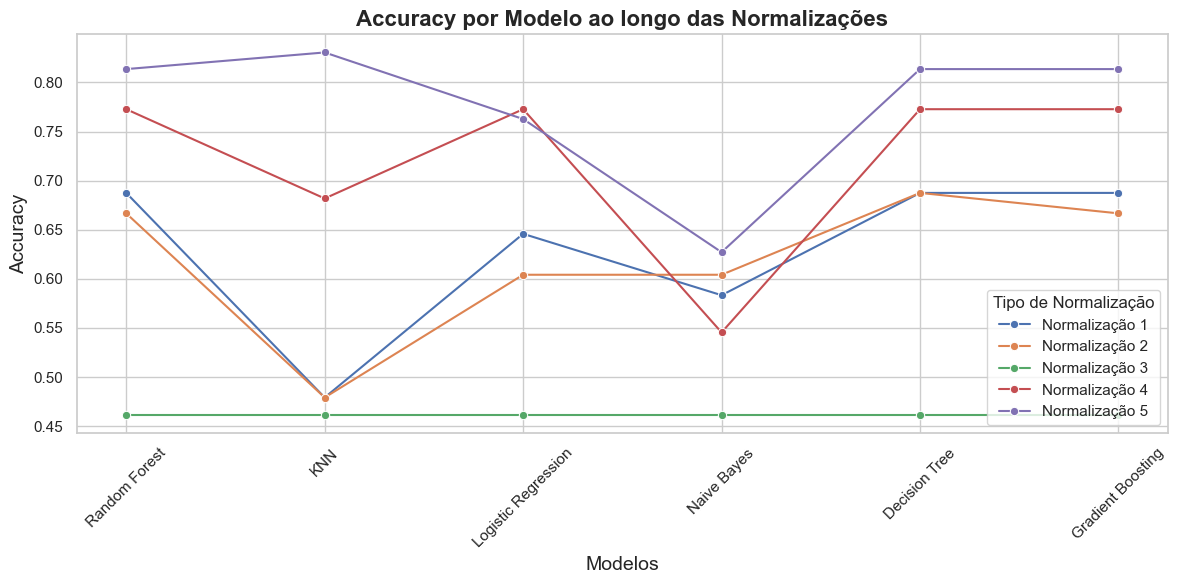

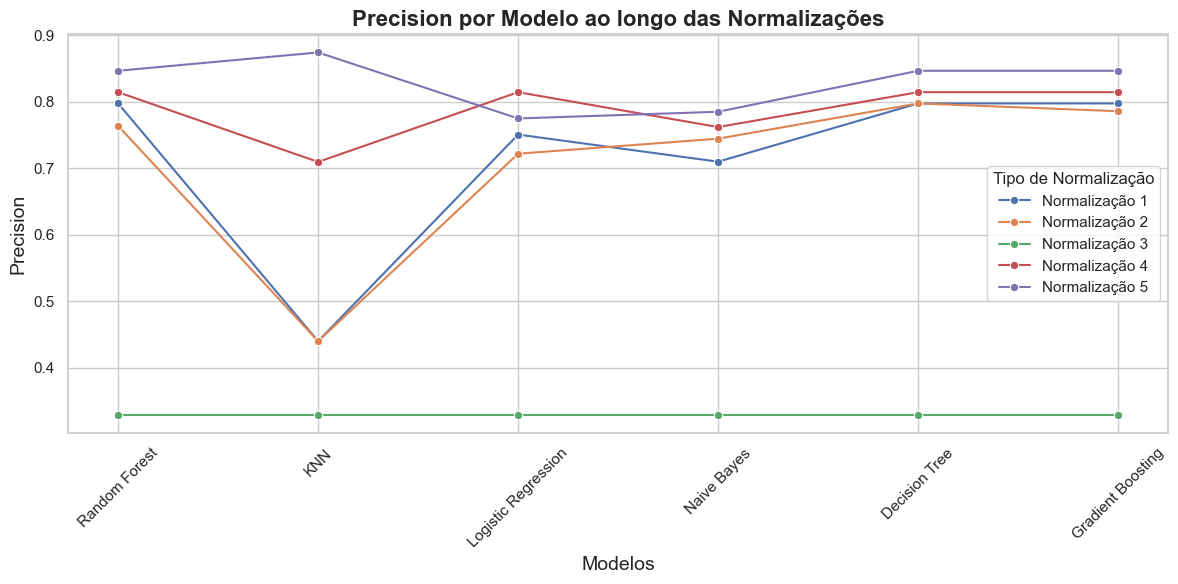

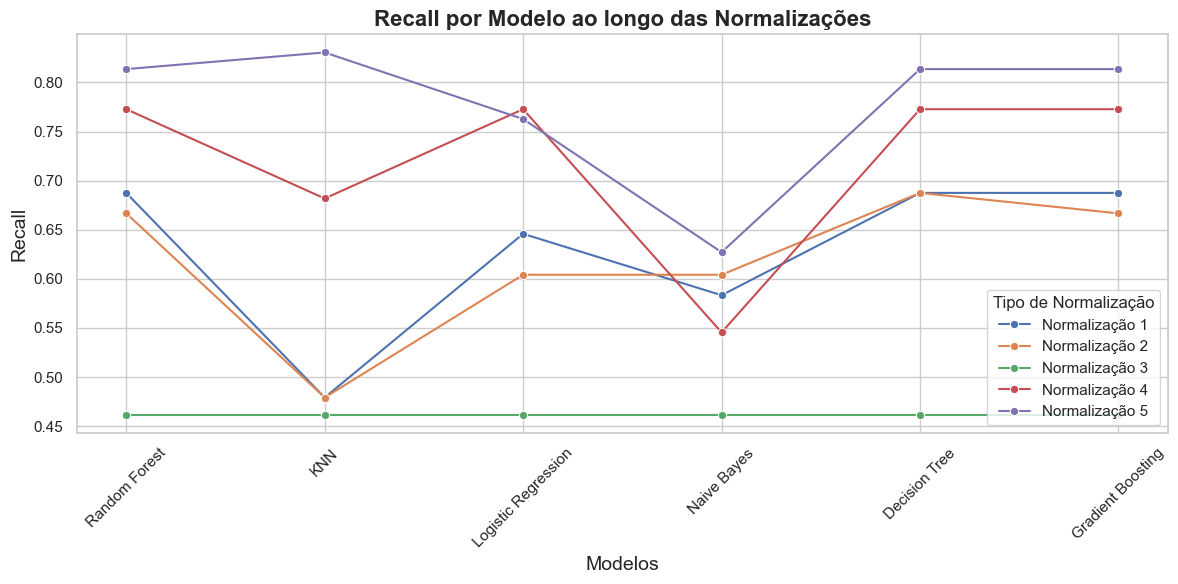

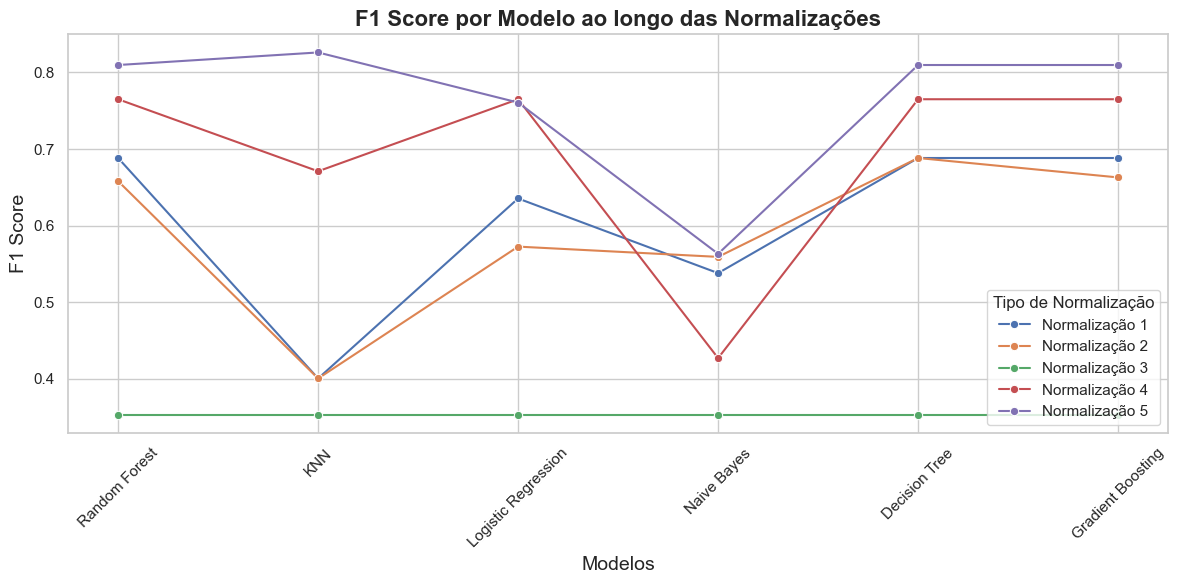

In [24]:
# Função para plotar gráficos de linhas
def plot_line_metrics(metrics_dfs, metric):
    plt.figure(figsize=(12, 6))
    for idx, metrics_df in enumerate(metrics_dfs):
        sns.lineplot(
            x="Model",
            y=metric,
            data=metrics_df,
            label=f'Normalização {idx+1}',
            marker='o'
        )
        
    plt.title(f"{metric} por Modelo ao longo das Normalizações", fontsize=16, fontweight='bold')
    plt.ylabel(metric, fontsize=14)
    plt.xlabel("Modelos", fontsize=14)
    plt.xticks(rotation=45)
    plt.legend(title="Tipo de Normalização")
    plt.tight_layout()
    plt.show()

# Chamada da função para cada métrica
for metric in ["Accuracy", "Precision", "Recall", "F1 Score"]:
    plot_line_metrics(model_results, metric)


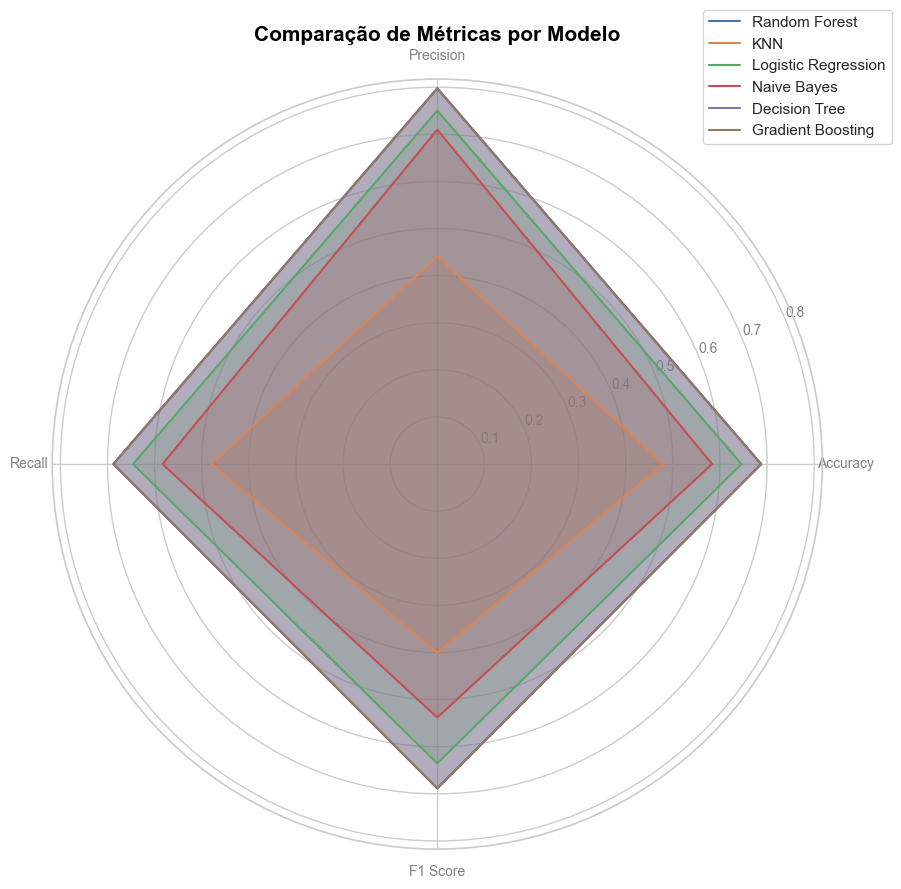

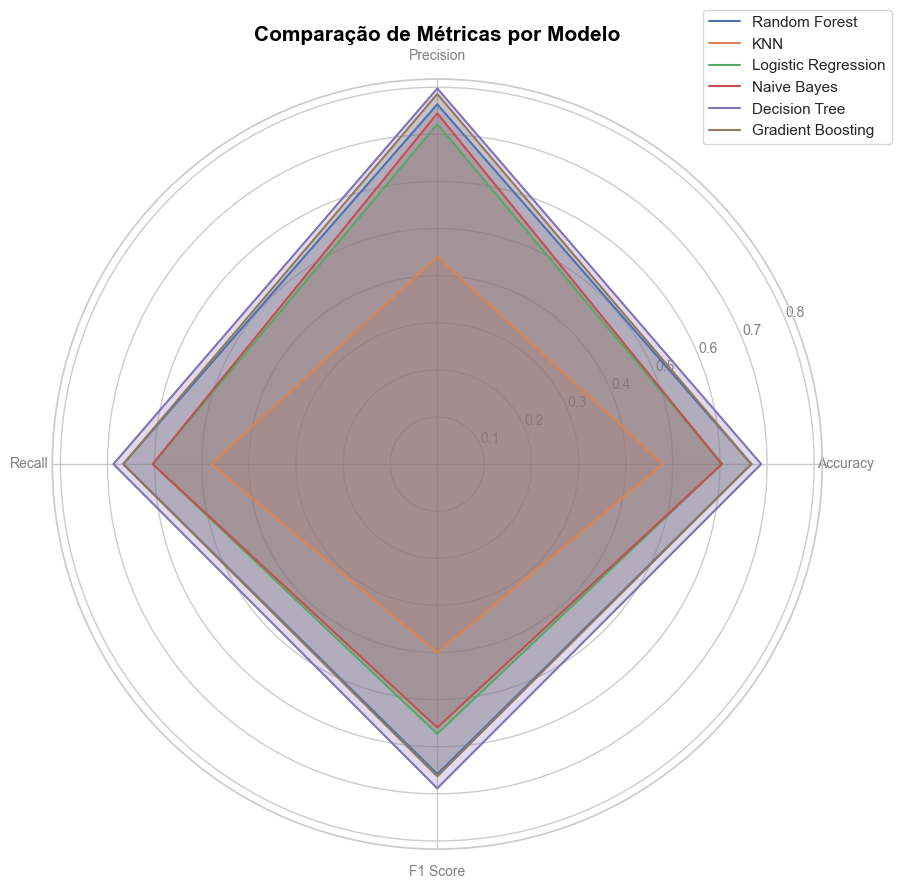

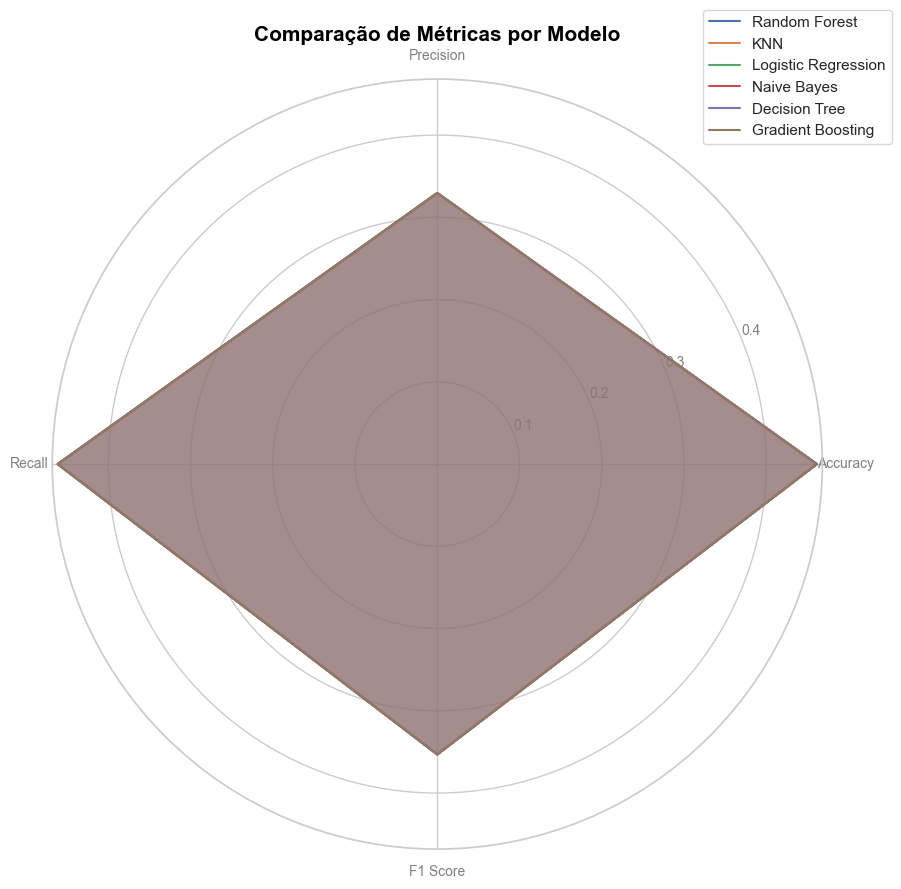

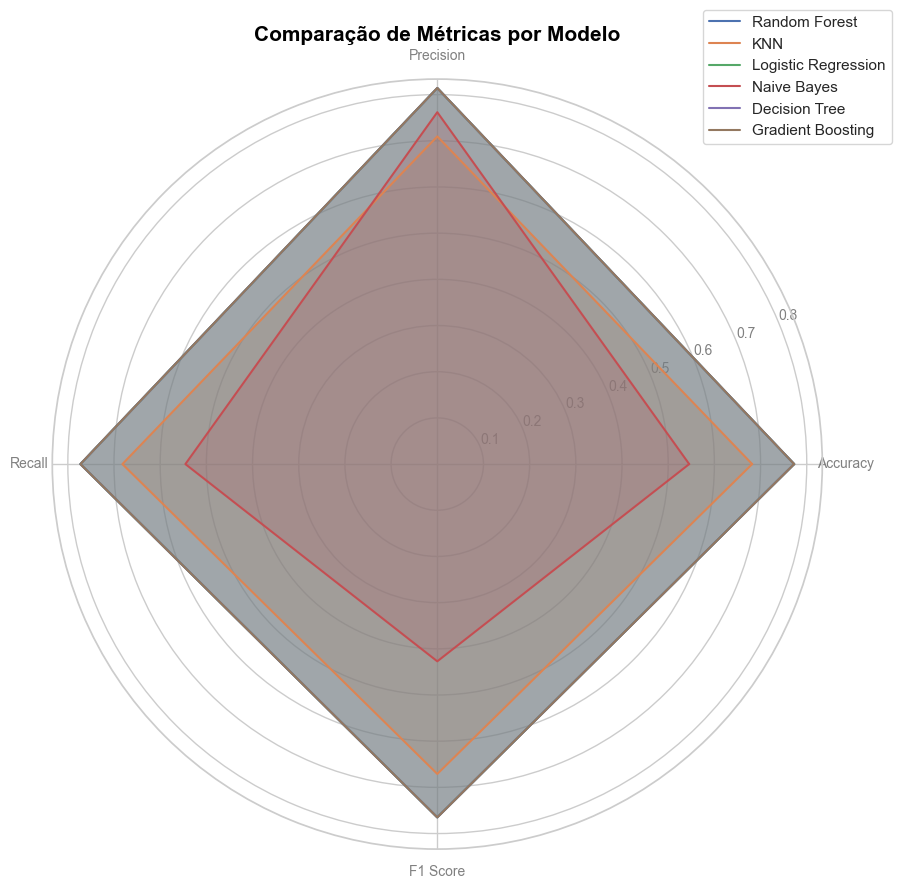

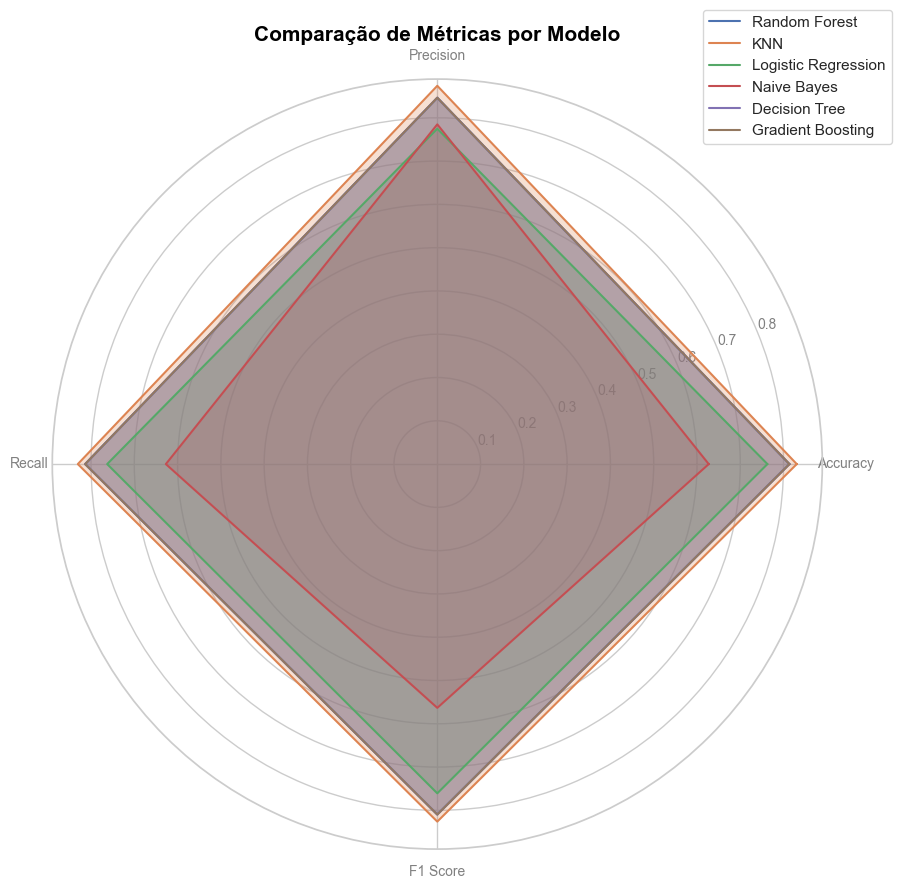

In [25]:
import numpy as np

# Função para plotar gráfico de radar
def plot_radar(metrics_df):
    # Número de variáveis
    labels = metrics_df.columns[1:-1]  # Excluir 'Model' e 'Normalization Type'
    num_vars = len(labels)

    # Criar um ângulo para cada variável
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # Fechar o círculo

    plt.figure(figsize=(10, 10))

    for index, row in metrics_df.iterrows():
        values = row[1:-1].values.flatten().tolist()
        values += values[:1]  # Fechar o círculo
        ax = plt.subplot(111, polar=True)
        ax.fill(angles, values, alpha=0.25)
        ax.plot(angles, values, label=row['Model'])

    plt.xticks(angles[:-1], labels, color='grey', size=10)
    plt.yticks(color='grey', size=10)
    plt.title('Comparação de Métricas por Modelo', size=15, color='black', weight='bold')
    plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
    plt.show()

# Chamada da função para cada DataFrame de resultados
for metrics_df in model_results:
    plot_radar(metrics_df)


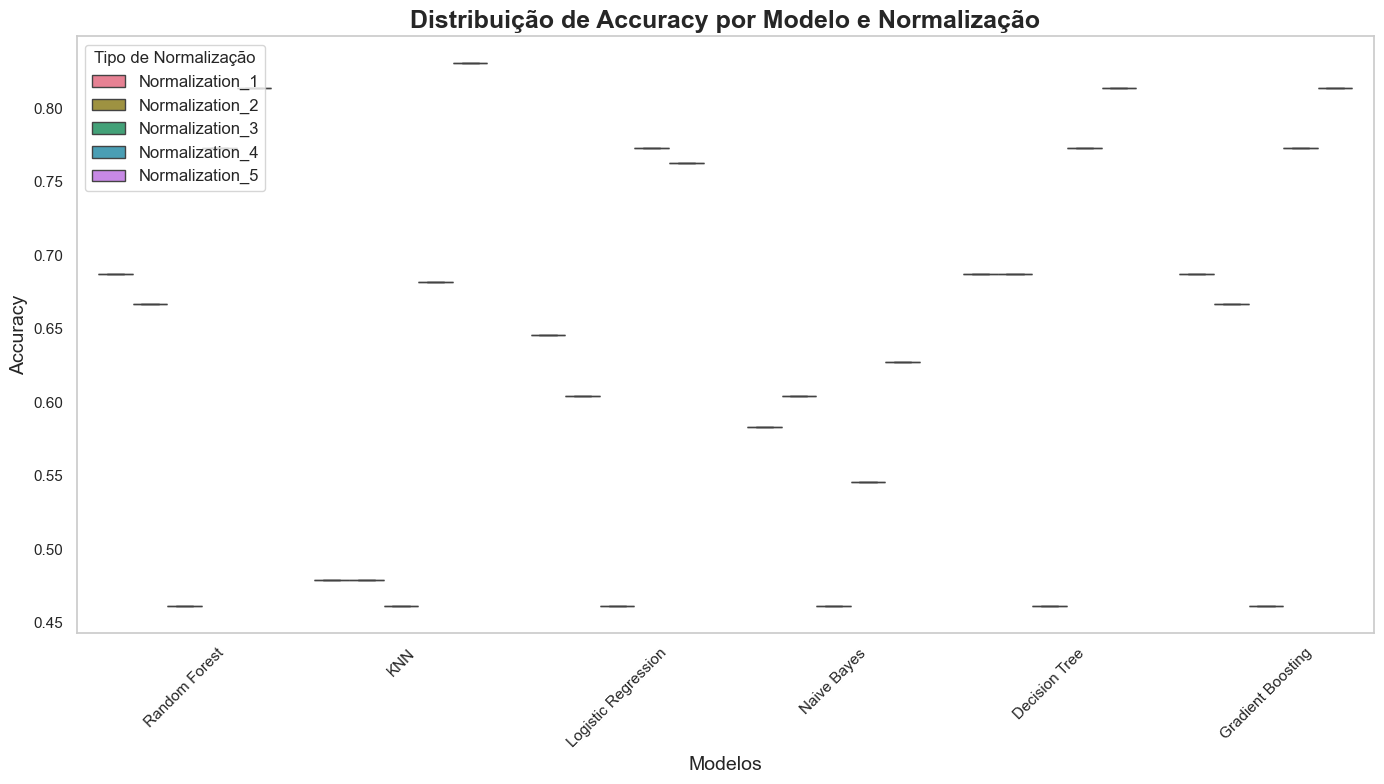

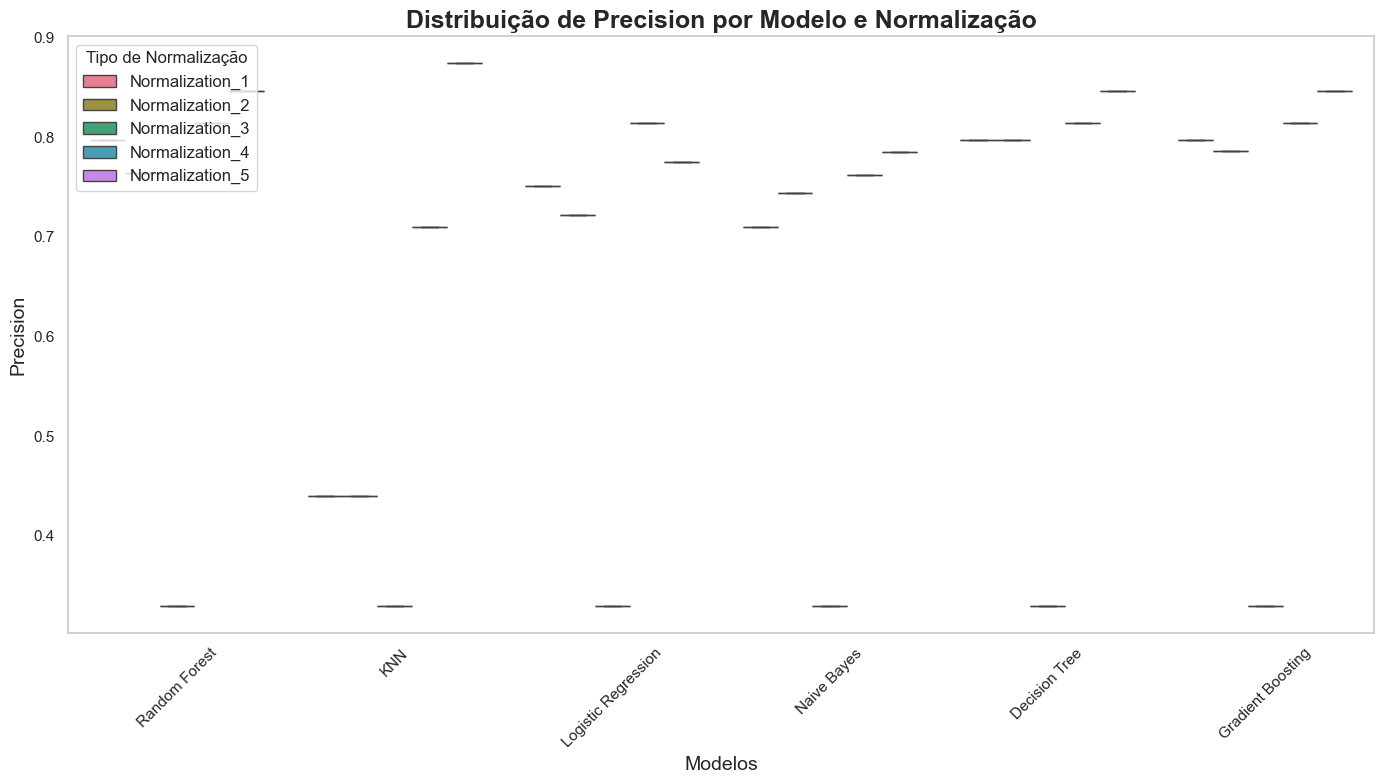

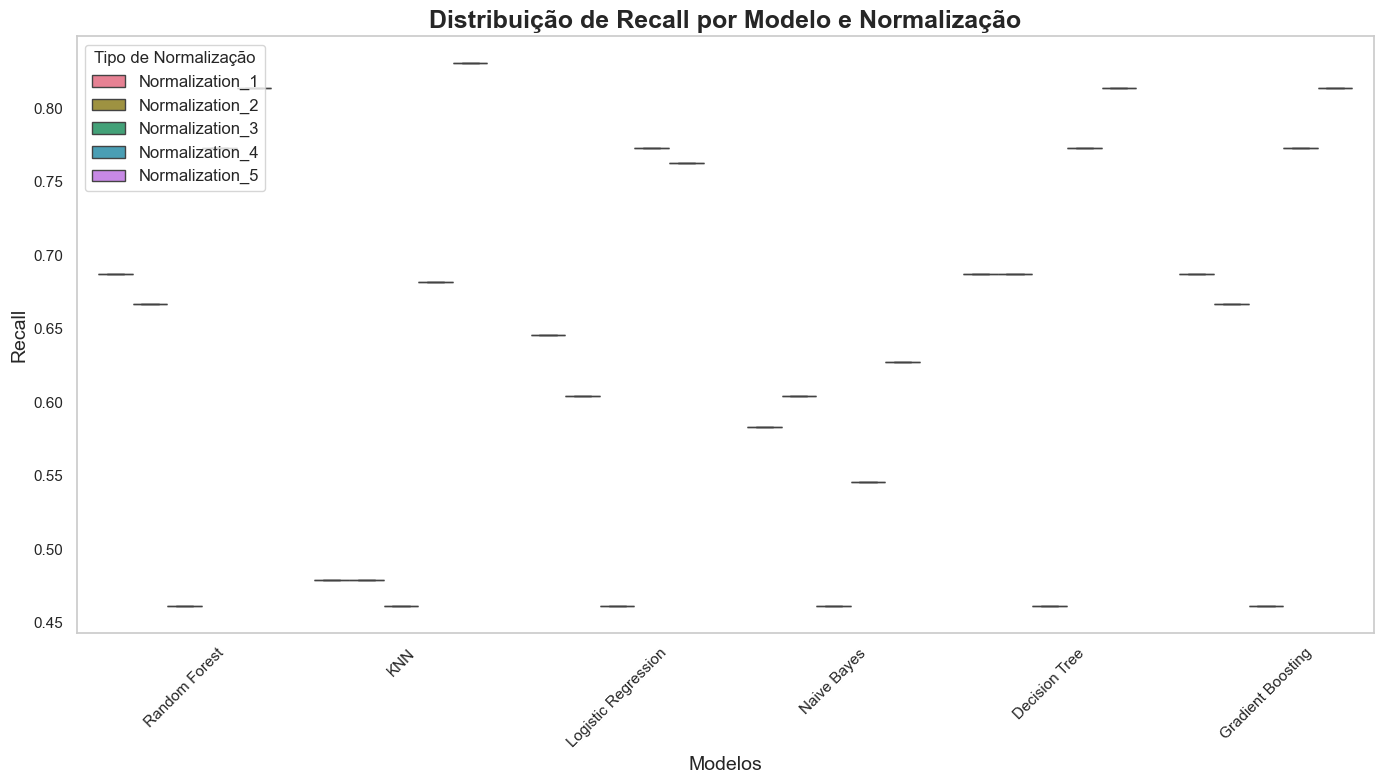

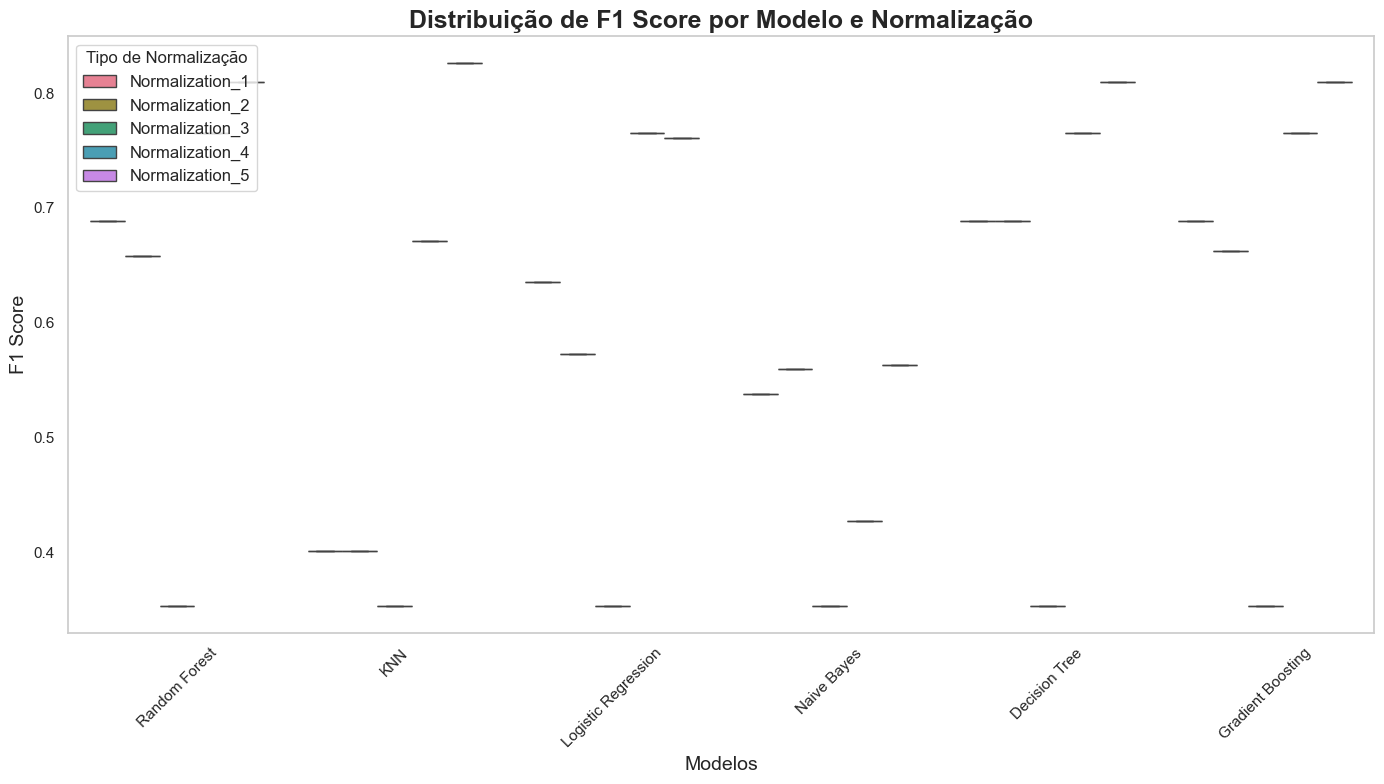

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Função para plotar boxplot com melhor visualização
def plot_boxplot(metrics_dfs, metric):
    all_metrics = []

    for metrics_df in metrics_dfs:
        for index, row in metrics_df.iterrows():
            all_metrics.append((row['Model'], row['Normalization Type'], row[metric]))

    boxplot_df = pd.DataFrame(all_metrics, columns=["Model", "Normalization Type", metric])
    
    plt.figure(figsize=(14, 8))
    sns.boxplot(x="Model", y=metric, hue="Normalization Type", data=boxplot_df, palette="husl", showfliers=False)
    
    plt.title(f"Distribuição de {metric} por Modelo e Normalização", fontsize=18, fontweight='bold')
    plt.ylabel(metric, fontsize=14)
    plt.xlabel("Modelos", fontsize=14)
    plt.xticks(rotation=45)
    plt.legend(title="Tipo de Normalização", fontsize=12, loc='upper left')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

# Chamada da função para cada métrica
for metric in ["Accuracy", "Precision", "Recall", "F1 Score"]:
    plot_boxplot(model_results, metric)


Conclusão e Interpretação dos Resultados
O projeto Luminary busca promover a reutilização de eletrônicos ao fornecer uma plataforma de revenda - o aplicativo Eden. Através do Eden, os usuários podem listar eletrônicos usados que desejam vender, incentivando o reuso e evitando o descarte incorreto desses produtos. Nossa análise utilizou dados coletados através de um formulário com perguntas sobre a intenção de uso do aplicativo Eden e outros fatores que poderiam influenciar essa decisão. Neste projeto, focamos em entender melhor quais características de um usuário podem estar associadas à sua decisão de usar o aplicativo, bem como desenvolver um modelo de aprendizado de máquina para prever essa intenção de uso.

Objetivo da Análise
O principal objetivo foi criar modelos de classificação para prever se um usuário "usaria o aplicativo" com base em suas respostas. Esse objetivo envolveu:

Pré-processar os dados, equilibrar as classes e aplicar normalizações diferentes.
Avaliar múltiplos algoritmos de aprendizado supervisionado.
Comparar e visualizar o desempenho dos modelos, utilizando as métricas de acurácia, precisão, recall e F1-score para medir a eficácia.
Métodos e Modelos
Para desenvolver modelos robustos, realizamos os seguintes passos:

Normalização e Balanceamento dos Dados: Utilizamos cinco tipos de normalização para padronizar os dados e aplicamos o método SMOTE para lidar com a desproporção entre as classes. A aplicação de diferentes técnicas de normalização permitiu explorar a influência de transformações específicas na performance dos modelos.
Modelos de Classificação e Seleção de Hiperparâmetros: Testamos seis algoritmos de aprendizado (Random Forest, KNN, Regressão Logística, Naive Bayes, Árvore de Decisão e Gradient Boosting). Para alguns modelos, ajustamos os hiperparâmetros usando GridSearchCV para selecionar os valores que maximizavam o F1-score – uma métrica escolhida por equilibrar precisão e recall, devido à sua relevância em contextos de dados desbalanceados.
Métricas Utilizadas
Para avaliar o desempenho dos modelos, consideramos as métricas de Acurácia, Precisão, Recall e F1-score:

Acurácia: Indica a proporção de previsões corretas, mas pode ser enganosa em conjuntos de dados desbalanceados. Em nosso caso, a acurácia sozinha não reflete totalmente o desempenho, pois temos uma quantidade maior de pessoas que responderam "não" para o uso do aplicativo.
Precisão: Mede quantas das previsões de "sim" estavam corretas, o que é importante para evitar prever positivamente (ou seja, que um usuário usaria o aplicativo) quando na verdade ele não usaria.
Recall: Mede a capacidade do modelo de identificar todos os casos de "sim". Para o projeto Luminary, é relevante porque queremos garantir que estamos identificando corretamente aqueles que usariam o aplicativo.
F1-score: Um equilíbrio entre precisão e recall, utilizado para ter uma visão mais completa sobre a eficácia do modelo em dados desbalanceados. O F1-score foi especialmente importante como métrica principal para selecionar modelos e ajustes, pois ele favorece um balanço entre capturar os usuários potenciais e minimizar falsos positivos.
Resultados e Visualizações
Para cada combinação de modelo e normalização, registramos e visualizamos os resultados usando gráficos de barras para as métricas mencionadas. Essas visualizações permitiram comparar rapidamente o desempenho dos modelos em termos de:

Diferenças entre normalizações: Observamos que algumas normalizações, como Log e IQR, apresentaram resultados melhores em modelos específicos (ex.: Gradient Boosting e Random Forest), sugerindo que certas transformações podem destacar características importantes dos dados. A normalização do tipo sqrt e capping não influenciaram positivamente na maioria dos modelos, o que foi interessante para reduzir complexidade ao evitar transformações desnecessárias.
Desempenho de Modelos: Modelos como Random Forest e Gradient Boosting se destacaram, enquanto o KNN apresentou resultados mais fracos. As técnicas de árvore foram as melhores por sua capacidade de capturar padrões não-lineares nos dados, o que se alinha com a complexidade dos fatores que levam uma pessoa a considerar o uso do aplicativo.
Interpretação e Potenciais Aplicações
Através das análises, identificamos que características específicas e técnicas de normalização influenciam diretamente a decisão de usar o Eden. No entanto, embora as métricas apresentem resultados animadores, a F1-score foi uma métrica crítica para selecionar o modelo final, pois equilibra as preocupações de falsos positivos e negativos. Isso é essencial para o aplicativo Eden, onde se busca entender o potencial real de uso da plataforma sem superestimar o interesse do público.

Com esses resultados, a equipe do projeto Luminary pode utilizar o modelo selecionado para:

Prever a aceitação do Eden: Em campanhas de marketing ou nas fases de lançamento em diferentes regiões, utilizando o modelo para segmentar melhor o público-alvo.
Ajustar o design do aplicativo: Caso os dados indiquem que certos grupos têm maior probabilidade de uso, é possível personalizar recursos, facilitando uma jornada intuitiva para usuários propensos a vender ou comprar eletrônicos usados.
Aprimorar o modelo com mais dados: À medida que mais usuários respondem a novas versões do formulário ou interagem com o aplicativo, os dados podem ser integrados e reanalisados para fortalecer o modelo preditivo.
Considerações Finais
Esse estudo evidencia que técnicas de normalização, balanceamento e ajuste de hiperparâmetros podem afetar significativamente a performance dos modelos preditivos. A abordagem cuidadosa com as métricas de avaliação também foi fundamental para interpretar os dados de forma significativa e evitar armadilhas comuns em dados desbalanceados.

Por fim, o projeto Luminary está agora mais preparado para lançar o Eden com uma visão clara sobre seu público potencial. O uso de aprendizado de máquina para prever a aceitação do aplicativo não só auxilia nas tomadas de decisão, mas também promove uma forma sustentável e conveniente de reutilização de eletrônicos no mercado.